## Limit 1
$\gamma_l(\epsilon_{10})= \gamma_l ,\;\; \gamma_h(\epsilon_{10})=0 ,\;\;\gamma_l(\epsilon_{20})=0 ,\;\; \gamma_h(\epsilon_{20})= \gamma_h$

In [1]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20,10
rcParams['xtick.labelsize'] = 34
rcParams['ytick.labelsize'] = 34
import numpy as np
import os 
my_path = os.path.abspath('/home/juan/Desktop/3level_img/')


class variables():
    def __init__(self):
         #eigen energies
        self.w10 = 20
        self.w2w1 = 1.2
        #carnot efficiency
        self.n_c  =np.arange(0,1,0.02)
        #temperatures
        self.b_l  = 1/np.array([150,50,25])[1] 
        self.b_h  = (1-self.n_c)*self.b_l
        #self.lw = np.sqrt(self.w2w1*(self.n**2)- (1-self.n)*(self.w2w1-1)**2 )/(2-self.n)
        self.lw = np.linspace(0,np.sqrt(self.w2w1),100)
        self.e_20 = self.w10*((1+self.w2w1 )/2 + np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2  ))
        self.e_10 = self.w10*((1+self.w2w1 )/2 - np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2  ))
        # efficiency
        self.n = 1- (self.e_10/self.e_20)
        #lindblad constants
        self.g_l  = 100
        #self.g_h  = np.array([self.g_l,self.g_l*0.5,self.g_l*0.2])
        self.g_h  = self.g_l*5
        self.g    = (self.g_l+ self.g_h)/2
        #cosine data
        self.c    = (self.w2w1 -1 )/(2*np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2 ))
        #case_3 (eta_c)
        
       
    def R(self):
        R_1= []
        for value in range(len(self.b_h)):
            R_1.append(self.g*((2/self.g_l)*( 1/2 + np.exp(-self.b_h[value]*self.e_20) )\
                               + (2/self.g_h)*( 1/2 + np.exp(-self.b_l*self.e_10) ) )\
                /(1+np.exp(-self.b_h[value]*self.e_20)+ np.exp(-self.b_l*self.e_10)))
        return R_1
    def GAMMA(self):
        return self.g**2/(self.n*self.e_20)**2

var = variables()
var.lw[1]


var.n

array([0.16666667, 0.16759863, 0.17035563, 0.17482776, 0.18085169,
       0.18823326, 0.19676881, 0.20626148, 0.21653133, 0.22742016,
       0.23879258, 0.25053484, 0.2625525 , 0.27476779, 0.28711696,
       0.29954793, 0.31201822, 0.32449319, 0.33694465, 0.34934966,
       0.36168957, 0.37394928, 0.38611654, 0.39818153, 0.41013637,
       0.42197482, 0.43369198, 0.44528409, 0.4567483 , 0.46808258,
       0.4792855 , 0.49035623, 0.50129437, 0.5120999 , 0.52277312,
       0.53331463, 0.5437252 , 0.55400584, 0.56415768, 0.57418199,
       0.58408015, 0.59385361, 0.6035039 , 0.61303261, 0.62244136,
       0.63173181, 0.64090563, 0.64996453, 0.65891021, 0.66774438,
       0.67646874, 0.685085  , 0.69359484, 0.70199995, 0.71030201,
       0.71850264, 0.7266035 , 0.73460618, 0.74251229, 0.75032339,
       0.75804103, 0.76566674, 0.77320201, 0.78064831, 0.78800712,
       0.79527984, 0.80246788, 0.80957263, 0.81659544, 0.82353763,
       0.83040051, 0.83718537, 0.84389347, 0.85052603, 0.85708

In [3]:
import sympy as sy
from sympy import real_roots
from sympy.abc import x
from  sympy.functions import exp


G = var.GAMMA()
R =var.R()
g = var.g
g_h = var.g_h
e_20 = var.e_20
n  = var.n
# P maximization polynomial
poly = (G**2/8)*(-1 +R/2)*x**6 \
        +(-3 + (15/8)*R )*(G**2)*x**5\
        + ( (G**2)*(13/8*R - 9/8) +G*(3/2*R -3/2))*x**4 \
        + ( (G**2)*(-5/8*R -9/4)+ 3*G*R)*x**3\
        + ( (G**2)*(-47/16*R+2) +G*(-13/4*R + 3/2) +R)*x**2\
        + (G**2/2 +G*(-7/2*R +1) -2*R)*x \
        +(G**2/4)*R +G*(R/4)-R  

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [72]:
poly1 = (-2*x*(g_h/2 + ((g_h**3)/(8*e_20))*((1+x)/2)**2 )\
        +(( (g_h**3)*(1-x**2)*(1+x))/(32*e_20)))\
        *((1-x)*(n**2+  ((g_h/(2*e_20))**2)*((1+x)/2)**2 +1))\
        -( (1-x**2)*(g_h/2 + ((g_h**3)/(8*e_20))*((1+x)/2)**2))*(-(n**2+((g_h/(2*e_20))**2)*((1+x)/2)**2 +1)\
        + (1-x**2)*(g_h/(4*e_20))**2)



In [68]:

def max_angle(poly):
    max_angle=[]
    for i in range(len(poly)):
        max_angle.append([sy.solve(poly[i],x)])
    return max_angle




In [31]:
max_angle1 = max_angle(poly)


In [69]:
max_angle2 =  max_angle(poly1)

In [42]:
from functools import reduce


def unique(array):
    ar = []
    for element in array:
        t = filter(lambda x : abs(x-element) <=0.1,ar)
        if not next(t,None):
            ar.append(element)
    return ar


def myfilter(array):
    for i in range(len(array)):
        array[i] = [value for value in array[i][0] if 0<sy.re(value)<=1 and sy.im(value)==0 ]
        
        if array[i]:
            array[i]= unique(array[i])
        
        else :
            array[i] = [-1]  
        
    return np.array(array)


# flatten the maximized angle array
second_max1= myfilter(max_angle1)
second_max1= [reduce(lambda a, b: a + b, value) for value in second_max1]
second_max2= myfilter(max_angle2)
second_max2= [reduce(lambda a, b: a + b, value) for value in second_max2]


TypeError: 'Float' object is not iterable

In [56]:
second_max2= [second_max2[0]]*50

## Second Maximization for Power against efficiency

In [4]:
#safe previous values

def power_n(var,index):
    b_l= var.b_l
    b_h= var.b_h[index]
    n  = var.n[index]
    R = var.R()[index]
    power = ( ( ((var.g*var.e_20*n)/2)*( np.exp(-b_h*var.e_20) \
                                            - np.exp(-b_l*var.e_10)) )\
                     /(1 +np.exp(-b_l*var.e_10)+np.exp(-b_h*var.e_20)) )\
                       *( (1-var.c**2)*(1+ (((var.g)/(n*var.e_20))**2)*((1+var.c)/2)**2) )\
                       /( (((var.g)/(n*var.e_20))**2)*(var.c**2)*(1+var.c)/2\
                         +R*(1-var.c)*(1+ (((var.g)/(n*var.e_20))**2)*((1+var.c)/2)**2) )                 
    return power



In [5]:
def POWER_beta(var):
    POWER=[]
    for value in range(len(var.b_h)):
        POWER.append(power_n(var,value))
    return POWER
        
PO= POWER_beta(var)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


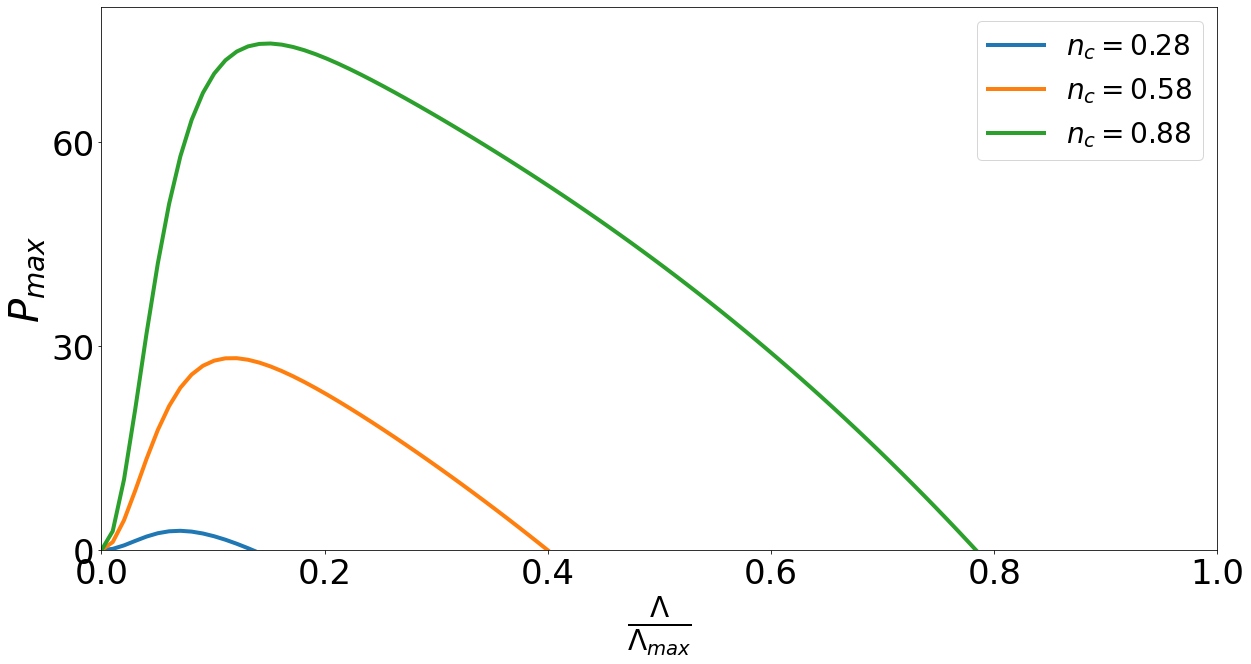

In [96]:
for i in range(14,len(var.b_h),15):
    plt.plot(var.lw/max(var.lw),PO[i],label=r'$n_c= %.2f$'%(var.n_c[i]),linewidth=4)
    plt.ylim(0,80)
    plt.xlim(0,1)
    plt.xlabel(r'$\frac{\Lambda}{ \Lambda_{max}}$', fontsize =40)
    plt.yticks(np.arange(0, max(PO[i])+10, 30))
    plt.xticks(np.arange(0, 1.2, .2))
    plt.ylabel(r'$P_{max}$',fontsize= 40)
    plt.legend(fontsize=28)
    plt.savefig(os.path.join(my_path,'L1_Pvs_lambda.eps'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


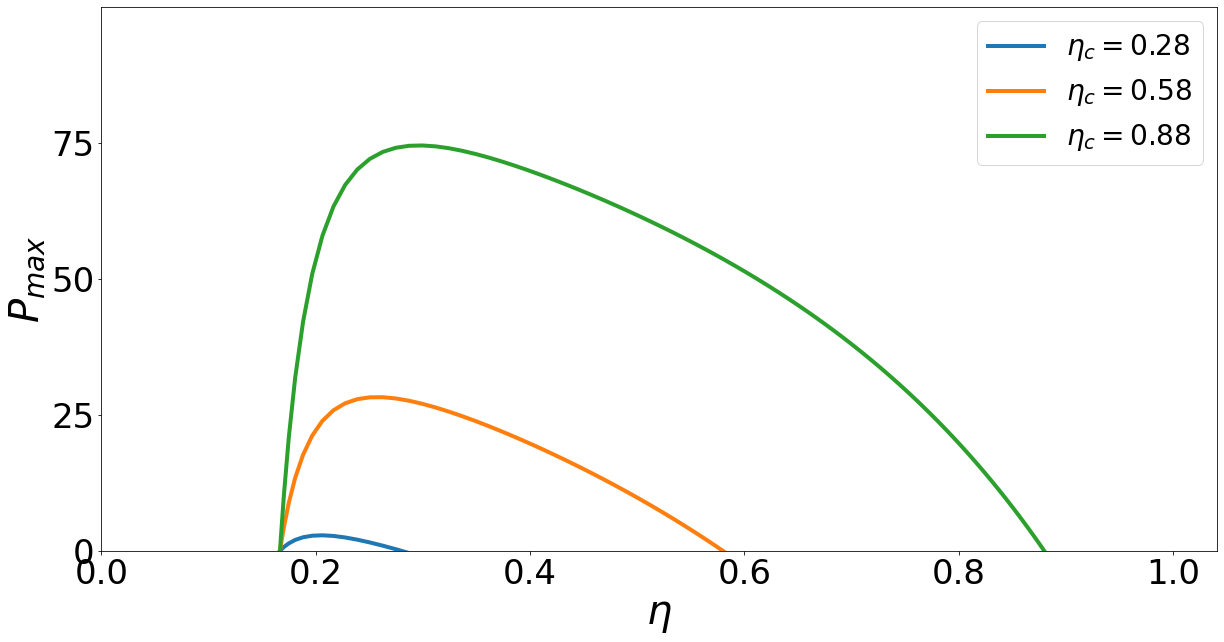

In [98]:
for i in range(14,len(var.b_h),15):
    plt.plot(var.n,PO[i],label=r'$ \eta_c =%.2f$'%(var.n_c[i]),linewidth=4)
    plt.ylim(-0,100)
    plt.xlabel(r'$\eta$', fontsize =40)
    plt.ylabel(r'$P_{max}$',fontsize= 40)
    plt.yticks(np.arange(0, max(PO[i]+10), 25))
    plt.xticks(np.arange(0, 1.2, .2))
    plt.savefig(os.path.join(my_path,'L1_Pvs_n.eps'))
    plt.legend(fontsize= 28)

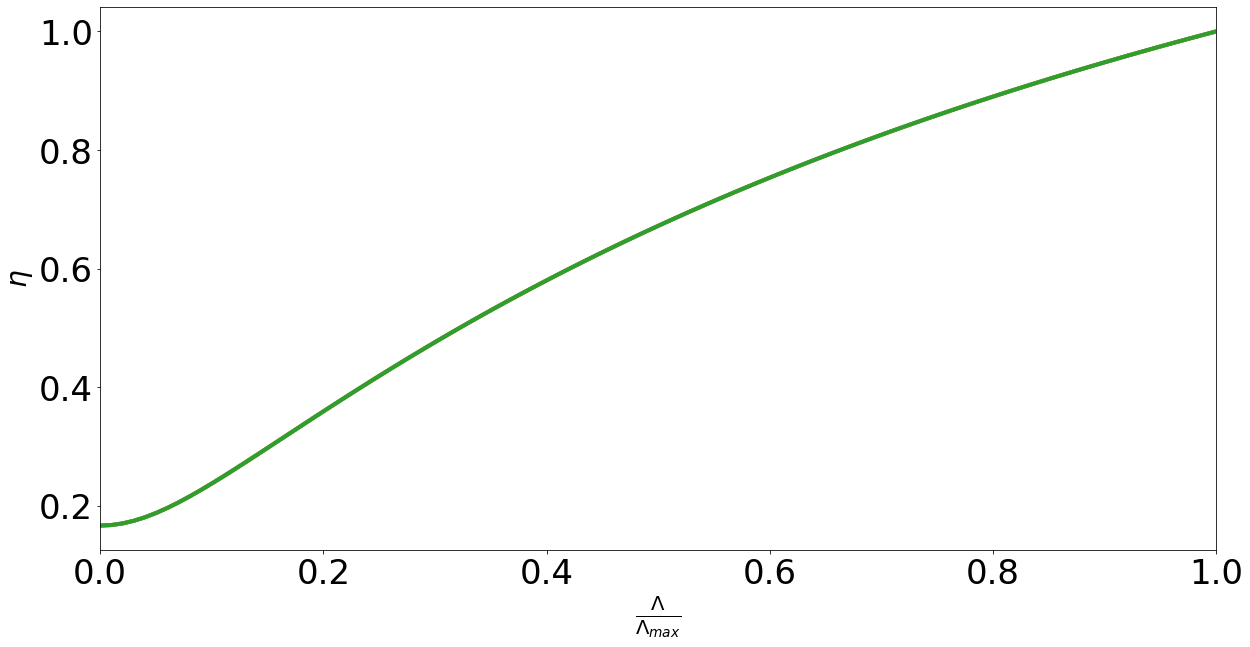

In [102]:
for i in range(5,len(var.b_h),15):
    plt.plot(var.lw/max(var.lw),var.n,linewidth=4)
    plt.xlabel(r'$\frac{\Lambda}{ \Lambda_{max}}$', fontsize =28)
    plt.ylabel(r'$\eta$',fontsize= 28)
    plt.xticks(np.arange(0, 1.2, .2))
    plt.xlim(0,1)
    plt.savefig(os.path.join(my_path,'L1_nvs_lambda.eps'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


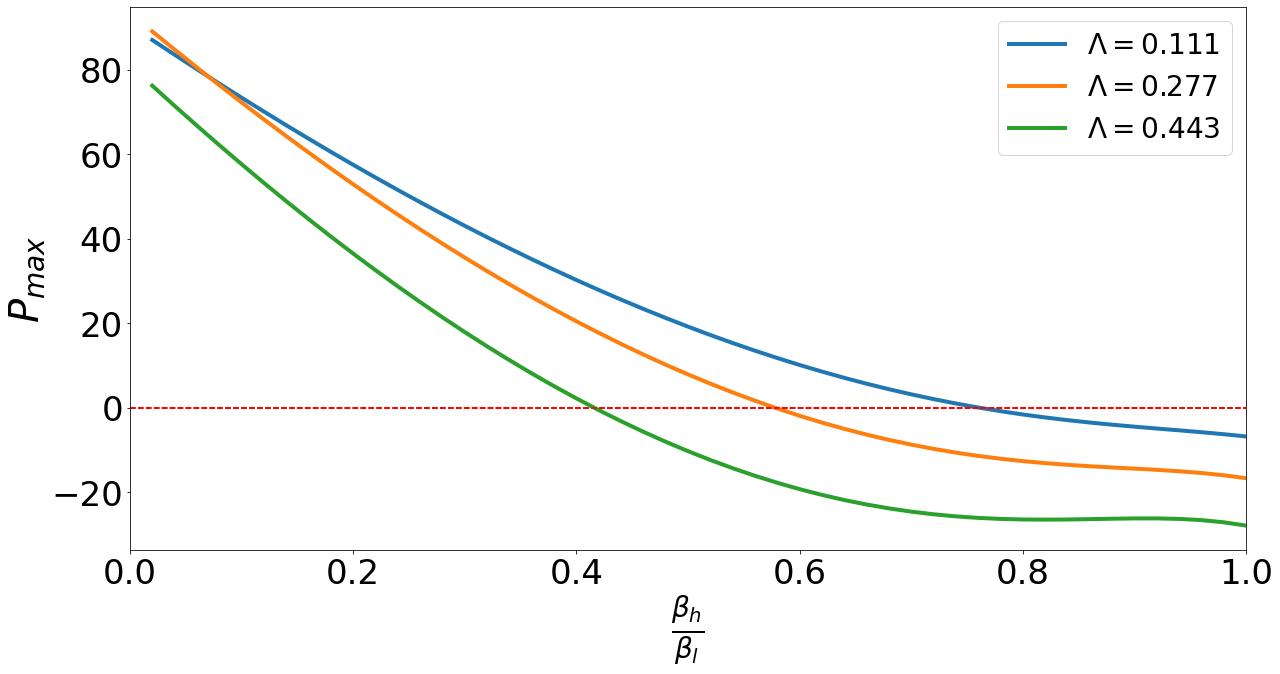

In [101]:
a =np.transpose(PO)
for i in range(10,50,15):
    #plt.plot(var.b_h,a[:][-(i+1)])
    plt.plot(var.b_h/var.b_l,a[:][i],\
             label= r'$\Lambda =%.3f$'%(var.lw[i]),linewidth=4)
    #plt.ylim(-10,500)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(r'$\frac{\beta_h}{\beta_l}$', fontsize =40)
    plt.ylabel(r'$P_{max}$',fontsize= 40)
    plt.legend(fontsize= 28)
    plt.xlim(0,1)
    plt.xticks(np.arange(0, 1.2, .2))
    #plt.title('maximized power against temperature' +r'$( T_l=%.f)$'%(1/var.b_l ),fontsize=18)
    plt.savefig(os.path.join(my_path,'L1_Pvs_bh.eps'))

In [57]:
def power_nlim(var,angle):
    var.c = np.array(angle)
    power = ((var.n*var.e_20*(1-var.c**2))/2 )*( np.exp(-var.b_h*var.e_20) - np.exp(-var.b_l*var.e_10) )\
            *(var.g_h/2+ (var.g_h**3/(8*var.e_20))*((1+var.c)/2)**2  )*(var.g_l/var.g_h)\
            /((1-var.c)*(var.n**2+ (((1+var.c)/2)**2)*(var.g_h/(2*var.e_20))**2 +1 ))
    return power
    

In [58]:
power_n2 = power_nlim(var,second_max2)
power_n2

array([0.344041544362388, 6.52559372639407, 12.4590803917744,
       18.1438491329450, 23.5792498156914, 28.7646345920095,
       33.6993579128826, 38.3827765409701, 42.8142495632045,
       46.9931384032988, 50.9188068341621, 54.5906209902232,
       58.0079493796610, 61.1701628965433, 64.0766348328689,
       66.7267408905185, 69.1198591931076, 71.2553702977456,
       73.1326572066978, 74.7511053789512, 76.1101027416819,
       77.2090397016249, 78.0473091563469, 78.6243065054172,
       78.9394296614814, 78.9920790612334, 78.7816576762880,
       78.3075710239512, 77.5692271778896, 76.5660367786964,
       75.2974130443565, 73.7627717806065, 71.9615313911926,
       69.8931128880231, 67.5569399012161, 64.9524386890443,
       62.0790381477708, 58.9361698213825, 55.5232679112127,
       51.8397692854628, 47.8851134886095, 43.6587427507102,
       39.1601019965984, 34.3886388549670, 29.3438036673496,
       24.0250494969863, 18.4318321375824, 12.5636101219567,
       6.41984473057951

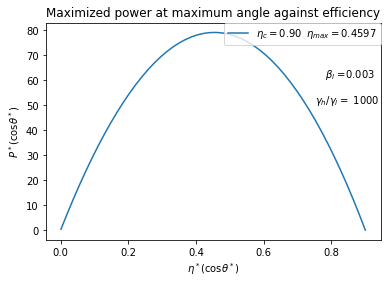

In [85]:
import matplotlib.pyplot as plt
import os 
my_path = os.path.abspath('/home/juan/Desktop/')

n = var.n
x = power_n2
nmax= var.n[np.where(x ==max(x))]
plt.plot(var.n,x,label=r'$\eta_c= %.2f$'%(var.n_c)+r'$ \;\;\eta_{max}=%.4f$'%(nmax))
#plt.vlines(var.n[np.where(x ==max(x))],0,max(x),color='r',label=r'$\eta_{max}= %.4f$'%(nmax))
plt.text(0.78, 61.24, r'$\beta_l$'+' =%.3f '%(var.b_l), fontsize=10)
plt.text(0.75, 50.46, r'$\gamma_h/\gamma_l= $'+' %.0f '%(var.g_h/var.g_l), fontsize=10)
plt.title('Maximized power at maximum angle against efficiency')
plt.xlabel(r'$\eta^*(\cos \theta^*)$')
plt.ylabel(r'$P^*(\cos \theta^*)$')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)
plt.savefig(os.path.join(my_path,'L1_extreme_delta.png'))    

In [17]:
import json 

dic = {'x':list(n),'y':list( power_n)}

In [1]:
import pickle
with open('limit1_n_c_'+'%.1f_'%(var.n_c)+'%.3f_'%(var.b_l)+'%.0f '%(var.g_h/var.g_l)+'.json','wb') as f:
    pickle.dump(dic,f)

NameError: name 'var' is not defined

##  Limit 2
